In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import torchmetrics
import os
import pytorch_lightning as pl
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import cv2 
import pandas as pd 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy.stats import norm

In [2]:
preds = torch.tensor([0.0164, 0.0074, 0.0070, 0.1430, 0.0067, 0.0056, 0.0063, 0.0173, 0.1630, 0.0159, 0.0056, 0.0116, 0.0105, 0.0116,
0.0075, 0.9964, 0.2219, 0.8845, 0.8991, 0.8338, 0.9956, 0.2558, 0.8554, 0.5313, 0.4199, 0.9965, 0.8429, 0.8161, 0.9762, 0.6293])
labels = torch.tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Intervalo de confianza del 95% para AUC-ROC: (0.746969737623668, 1.253030262376332)
Área bajo la curva ROC (AUC-ROC): 1.0


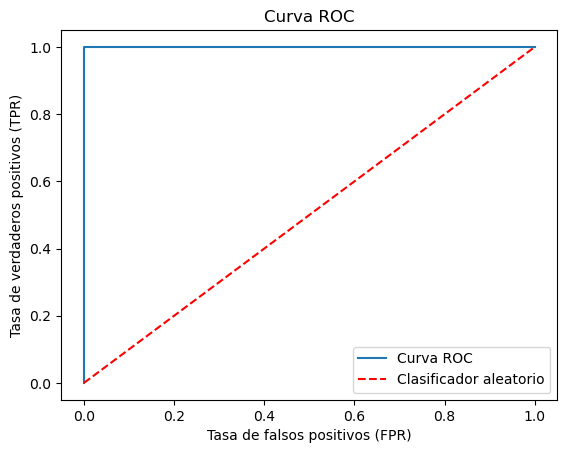

In [3]:
fpr, tpr, thresholds = roc_curve(labels, preds)
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend()

auc_score = roc_auc_score(labels, preds)
variance_delong = (auc_score * (1 - auc_score) + (auc_score ** 2) / (2 * len(labels)))
z_score = norm.ppf(0.975) 
ci_lower = auc_score - z_score * np.sqrt(variance_delong)
ci_upper = auc_score + z_score * np.sqrt(variance_delong)

print("Intervalo de confianza del 95% para AUC-ROC:", (ci_lower, ci_upper))
print("Área bajo la curva ROC (AUC-ROC):", auc_score)

plt.show()

In [4]:
acc = torchmetrics.Accuracy("binary")(preds, labels)
precision = torchmetrics.Precision("binary")(preds, labels)
recall = torchmetrics.Recall("binary")(preds, labels)
cm = torchmetrics.ConfusionMatrix(task="binary", num_classes=2)(preds, labels)

print(f"Val Accuracy: {acc}")
print(f"Val Precision: {precision}")
print(f"Val Recall: {recall}")
print(f"Confusion Matrix:\n {cm}")

Val Accuracy: 0.8999999761581421
Val Precision: 1.0
Val Recall: 0.800000011920929
Confusion Matrix:
 tensor([[15,  0],
        [ 3, 12]])
